In [2]:
prod <- read.csv('./data/productivityORG.csv')

In [4]:
head(prod)

,date,quarter,department,day,team,target,smv,wip,over_time,incentive,idle_time,idle_men,numchange,numworkers,productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
2,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0,0,0,8.0,0.8865000
3,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
4,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
5,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0,0,0,56.0,0.8003819
6,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0,0,0,56.0,0.8001250


In [6]:
head(prod$date)

[1] "1/1/2015" "1/1/2015" "1/1/2015" "1/1/2015" "1/1/2015" "1/1/2015"

In [7]:
prod$date <- as.Date(prod$date, format='%m/%d/%y')

In [8]:
head(prod$date)

[1] "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01"
[6] "2020-01-01"

In [12]:
prod$quarter <- factor(prod$quarter)

In [13]:
prod$department <- factor(prod$department)

In [14]:
prod$day <- factor(prod$day)

In [15]:
prod$team <- factor(prod$team)

In [16]:
summary(prod)

      date                quarter        department         day     
 Min.   :2020-01-01   Quarter1:360   finishing:506   Monday   :199  
 1st Qu.:2020-01-18   Quarter2:335   sweing   :691   Saturday :187  
 Median :2020-02-03   Quarter3:210                   Sunday   :203  
 Mean   :2020-02-04   Quarter4:248                   Thursday :199  
 3rd Qu.:2020-02-23   Quarter5: 44                   Tuesday  :201  
 Max.   :2020-03-11                                  Wednesday:208  
                                                                    
      team         target            smv             wip         
 2      :109   Min.   :0.0700   Min.   : 2.90   Min.   :    0.0  
 8      :109   1st Qu.:0.7000   1st Qu.: 3.94   1st Qu.:    0.0  
 1      :105   Median :0.7500   Median :15.26   Median :  586.0  
 4      :105   Mean   :0.7296   Mean   :15.06   Mean   :  687.2  
 9      :104   3rd Qu.:0.8000   3rd Qu.:24.26   3rd Qu.: 1083.0  
 10     :100   Max.   :0.8000   Max.   :54.56   Max.

In [17]:
# 18p - 의류생산성 데이터의 상자그림

In [18]:
attach(prod)

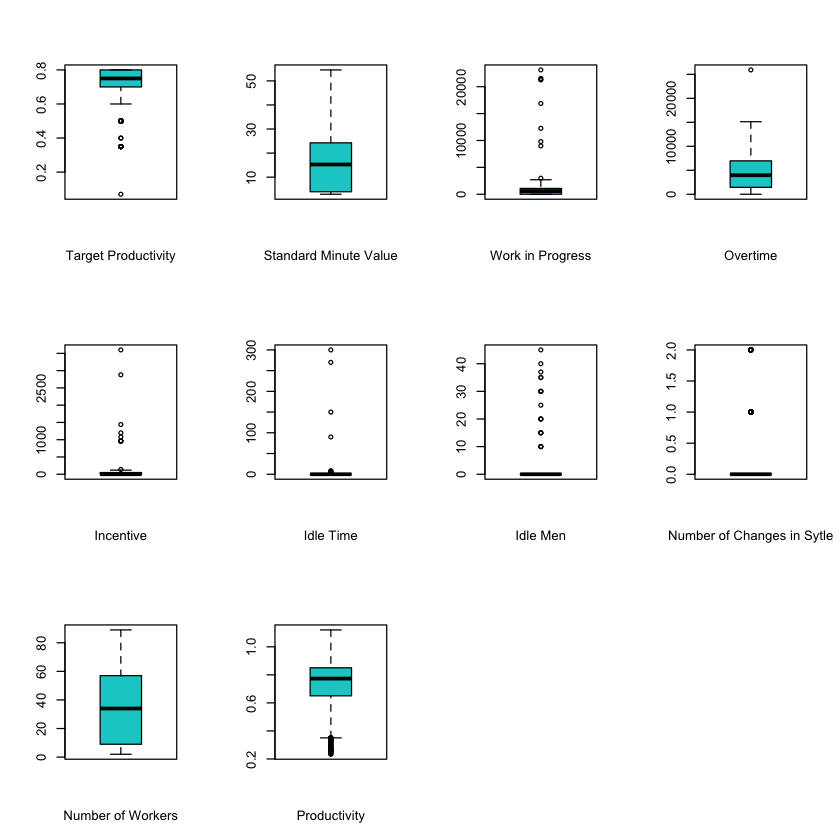

In [19]:
par(mfrow=c(3,4))
boxplot(target, col='cyan3',xlab='Target Productivity')
boxplot(smv, col='cyan3',xlab='Standard Minute Value')
boxplot(wip, col='cyan3',xlab='Work in Progress')
boxplot(over_time, col='cyan3',xlab='Overtime')
boxplot(incentive, col='cyan3',xlab='Incentive')
boxplot(idle_time, col='cyan3',xlab='Idle Time')
boxplot(idle_men, col='cyan3',xlab='Idle Men')
boxplot(numchange, col='cyan3',xlab='Number of Changes in Sytle')
boxplot(numworkers, col='cyan3',xlab='Number of Workers')
boxplot(productivity, col='cyan3',xlab='Productivity')

In [20]:
# 19p - 의류생산성데이터의 이상치 제거

In [21]:
dout <- rep(0, 15)
dout2 <- rep(0, 15)
dout
dout2

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [22]:
for(i in 6:15){
    t3 <- quantile(prod[,i], 0.75)
    t1 <- quantile(prod[,i], 0.25)
    tq <- IQR(prod[,i], 0.75)
    dout[i] <- t3 + 1.5 * tq
    dout2[i] <- t1 - 1.5 * tq
}

In [29]:
# 열길이(변수 갯수)
length(prod)
ncol(prod)

[1] 15

[1] 15

In [30]:
# 행길이
nrow(prod)

[1] 1197

In [32]:
outindex <- matrix(0, nrow(prod), 15)
head(outindex)

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
dout
dout2

[1]     0.000000     0.000000     0.000000     0.000000     0.000000
 [6]     0.950000    54.740000  2707.500000 15240.000000   125.000000
[11]     0.000000     0.000000     0.000000   129.000000     1.150171

[1]     0.0000000     0.0000000     0.0000000     0.0000000     0.0000000
 [6]     0.5500000   -26.5400000 -1624.5000000 -6840.0000000   -75.0000000
[11]     0.0000000     0.0000000     0.0000000   -63.0000000     0.3503891

In [37]:
for (i in 1:1197){
    for (j in 6:15){
        if(prod[i, j] > dout[j] || prod[i, j] < dout2[j]){
            outindex[i, j] <- 1
        }
    }
}

In [48]:
# outindex(행렬)의 한행이 모두 0이된다면 그 행 삭제 - 문자열은 어떻게 처리하나 했더니 생각해보니 팩터로 바꼈음
prod2 <- prod[apply(outindex, 1, sum)==0,]

In [43]:
head(prod2)

,date,quarter,department,day,team,target,smv,wip,over_time,incentive,idle_time,idle_men,numchange,numworkers,productivity
,<date>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,2020-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
2,2020-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0,0,0,8.0,0.8865000
3,2020-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
4,2020-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
5,2020-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0,0,0,56.0,0.8003819
6,2020-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0,0,0,56.0,0.8001250


In [45]:
prodnew <- prod2[, -c(1, 11:13)]

In [47]:
head(prodnew)

,quarter,department,day,team,target,smv,wip,over_time,incentive,numworkers,productivity
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,59.0,0.9407254
2,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,8.0,0.8865000
3,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,30.5,0.8005705
4,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,30.5,0.8005705
5,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,56.0,0.8003819
6,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,56.0,0.8001250


In [49]:
# 파일 안쓸거라서 주석처리함
# write.csv(prodnew, 'productivityREG.csv', quote=F, row.names=F)

In [50]:
detach(prod)